## Import modules

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from dataset_exploration.utils import create_histogram, read_annotation
from configs.utils import get_dataset_dir
import sys
from analyze_stuff import get_config, get_dataloader

/home/z/pro/Computer_Vision_Project/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [2]:
config_path = "../configs/tdt4265.py"
cfg = get_config(config_path)
dataset_to_analyze = "train"  # or "val"
dataloader = get_dataloader(cfg, dataset_to_analyze)

# Using pandas

## Annotation

In [44]:
import pandas as pd

training_data = read_annotation(get_dataset_dir("tdt4265_2022/train_annotations.json"))
adf = pd.DataFrame.from_records(pd.array(training_data["annotations"]))
cdf = pd.DataFrame.from_records(pd.array(training_data["categories"]))
df = adf.merge(cdf, left_on="category_id", right_on="id")
df

,bbox,area,category_id,image_id,id_x,segmentation,iscrowd,name,id_y,supercategory
0,"[725.93, 63.64, 20.40000000000009, 13.73999999...",280.2960,1,1,1,[],0,car,1,
1,"[107.8, 78.1, 37.3, 39.0]",1454.7000,1,1,5,[],0,car,1,
2,"[206.4, 84.9, 32.0, 42.599999999999994]",1363.2000,1,1,6,[],0,car,1,
3,"[730.6, 64.18, 20.539999999999964, 14.71999999...",302.3488,1,2,9,[],0,car,1,
4,"[107.1, 79.04, 35.400000000000006, 37.75]",1336.3500,1,2,13,[],0,car,1,
...,...,...,...,...,...,...,...,...,...,...
18282,"[613.29, 66.06, 22.350000000000023, 17.17]",383.7495,2,1238,15130,[],0,truck,2,
18283,"[613.03, 65.27, 22.370000000000005, 17.3200000...",387.4484,2,1239,15149,[],0,truck,2,
18284,"[612.77, 64.49, 22.399999999999977, 17.47]",391.3280,2,1240,15168,[],0,truck,2,
18285,"[612.52, 63.71, 22.409999999999968, 17.6199999...",394.8642,2,1241,15188,[],0,truck,2,


In [31]:
# Check if there is any iscrowd
df.loc[df['iscrowd'] == 1]

,bbox,area,category_id,image_id,segmentation,iscrowd,name,id,supercategory


In [32]:
#Check if all bbox have a length of 4 elements
df.loc[df['bbox'].str.len() != 4]

,bbox,area,category_id,image_id,segmentation,iscrowd,name,id,supercategory


[Text(0, 0, '9563'),
 Text(0, 0, '4910'),
 Text(0, 0, '1588'),
 Text(0, 0, '1043'),
 Text(0, 0, '615'),
 Text(0, 0, '445'),
 Text(0, 0, '123')]

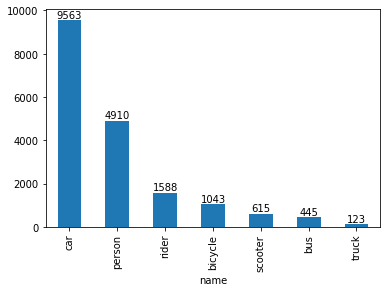

In [46]:
ax = df.value_counts(df['name']).plot.bar()
ax.bar_label(ax.containers[0])

## Draw figure

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [80]:
colors = {
    "car": "green",
    "person": "blue",
    "rider": "brown",
    "bicycle": "pink",
    "bus": "red",
    "scooter": "black",
    "truck": "yellow"
}